In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import model_selection
import seaborn as sns

In [3]:
def Average(lst):
    return sum(lst)/len(lst)

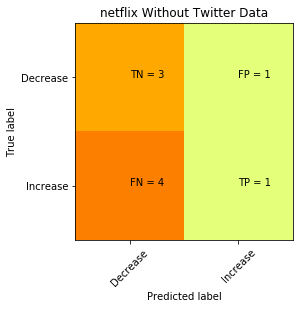

In [9]:
stocks = ["amazon","apple","facebook","google","netflix"]

withTwitter = []
withoutTwitter = []
fitWithTwitter = []
fitWithoutTwitter = []
pos = []
neg = []
tot = []

state = 0
while state < 100:
    for stock in stocks:
        Stock_Prediction = pd.read_csv('faangStockTweets\\' + stock + '.csv')
        Stock_Prediction = pd.DataFrame(Stock_Prediction).head(29)

        ##############################WITH TWITTER DATA##############################################

        X = Stock_Prediction.drop(['Stock_Date','Tweet_Date','change'],axis=1)
        y = Stock_Prediction['change']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=(state+10))



        model = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Decrease','Increase']
        plt.title(stock + ' With Twitter Data')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        s = [['TN','FP'], ['FN', 'TP']]
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
        #plt.show()

        fit = float(model.score(X_train,y_train))
        fitWithTwitter.append(fit)
        acc = float(metrics.accuracy_score(y_test,y_pred))
        withTwitter.append(acc)

        feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
        pos.append(feature_imp['Positive'])
        neg.append(feature_imp['Negative'])
        tot.append(feature_imp['Total'])
 
        #############################WITHOUT TWITTER DATA########################################

        X = Stock_Prediction.drop(['Stock_Date','Tweet_Date','change','Positive',
                                  'Negative','Total'],axis=1)
        y = Stock_Prediction['change']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=(state+10))

        model = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Decrease','Increase']
        plt.title(stock + ' Without Twitter Data')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        s = [['TN','FP'], ['FN', 'TP']]
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
        #plt.show()

        fit = float(model.score(X_train,y_train))
        fitWithoutTwitter.append(fit)
        acc = float(metrics.accuracy_score(y_test,y_pred))
        withoutTwitter.append(acc)

    state += 1

In [10]:
amazonWithTwitter = []
appleWithTwitter = []
facebookWithTwitter = []
googleWithTwitter = []
netflixWithTwitter = []
amazonWithTwitter1 = []
appleWithTwitter1 = []
facebookWithTwitter1 = []
googleWithTwitter1 = []
netflixWithTwitter1 = []
amazonPos = []
applePos = []
facebookPos = []
googlePos = []
netflixPos = []
amazonNeg = []
appleNeg = []
facebookNeg = []
googleNeg = []
netflixNeg = []
amazonTot = []
appleTot = []
facebookTot = []
googleTot = []
netflixTot = []

amazonWithoutTwitter = []
appleWithoutTwitter = []
facebookWithoutTwitter = []
googleWithoutTwitter = []
netflixWithoutTwitter = []
amazonWithoutTwitter1 = []
appleWithoutTwitter1 = []
facebookWithoutTwitter1 = []
googleWithoutTwitter1 = []
netflixWithoutTwitter1 = []

x = 0
while x < len(withTwitter):
    if x%5 == 0:
        amazonWithTwitter.append(withTwitter[x])
        amazonWithoutTwitter.append(withoutTwitter[x])
        amazonWithTwitter1.append(fitWithTwitter[x])
        amazonWithoutTwitter1.append(fitWithoutTwitter[x])
        amazonPos.append(pos[x])
        amazonNeg.append(neg[x])
        amazonTot.append(tot[x])
    elif x%5 == 1:
        appleWithTwitter.append(withTwitter[x])
        appleWithoutTwitter.append(withoutTwitter[x])
        appleWithTwitter1.append(fitWithTwitter[x])
        appleWithoutTwitter1.append(fitWithoutTwitter[x])
        applePos.append(pos[x])
        appleNeg.append(neg[x])
        appleTot.append(tot[x])
    elif x%5 == 2:
        facebookWithTwitter.append(withTwitter[x])
        facebookWithoutTwitter.append(withoutTwitter[x])
        facebookWithTwitter1.append(fitWithTwitter[x])
        facebookWithoutTwitter1.append(fitWithoutTwitter[x])
        facebookPos.append(pos[x])
        facebookNeg.append(neg[x])
        facebookTot.append(tot[x])
    elif x%5 == 3:
        googleWithTwitter.append(withTwitter[x])
        googleWithoutTwitter.append(withoutTwitter[x])
        googleWithTwitter1.append(fitWithTwitter[x])
        googleWithoutTwitter1.append(fitWithoutTwitter[x])
        googlePos.append(pos[x])
        googleNeg.append(neg[x])
        googleTot.append(tot[x])
    elif x%5 == 4:
        netflixWithTwitter.append(withTwitter[x])
        netflixWithoutTwitter.append(withoutTwitter[x])
        netflixWithTwitter1.append(fitWithTwitter[x])
        netflixWithoutTwitter1.append(fitWithoutTwitter[x])
        netflixPos.append(pos[x])
        netflixNeg.append(neg[x])
        netflixTot.append(tot[x])
    x += 1

Amazon With Twitter Avg:  0.5022222222222222
Apple With Twitter Avg:  0.47444444444444434
Facebook With Twitter Avg:  0.536666666666667
Google With Twitter Avg:  0.5000000000000001
Netflix With Twitter Avg:  0.5277777777777777
--------------------------
Amazon Without Twitter Avg:  0.5055555555555553
Apple Without Twitter Avg:  0.4433333333333331
Facebook Without Twitter Avg:  0.5366666666666667
Google Without Twitter Avg:  0.43111111111111106
Netflix Without Twitter Avg:  0.5455555555555555

Amazon With Twitter Fit:  0.9040000000000002
Apple With Twitter Fit:  0.8990000000000004
Facebook With Twitter Fit:  0.9050000000000002
Google With Twitter Fit:  0.9030000000000004
Netflix With Twitter Fit:  0.9035000000000002
--------------------------
Amazon Without Twitter Fit:  0.8990000000000008
Apple Without Twitter Fit:  0.8755
Facebook Without Twitter Fit:  0.8910000000000009
Google Without Twitter Fit:  0.8739999999999999
Netflix Without Twitter Fit:  0.9075000000000004

Total:  0.3589326

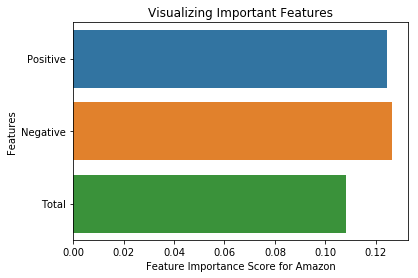

Total:  0.44929290794572657


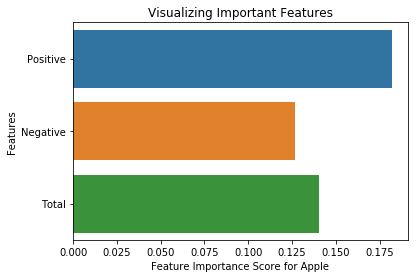

Total:  0.4347675052206892


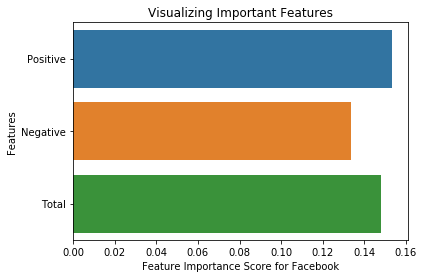

Total:  0.45965813198215766


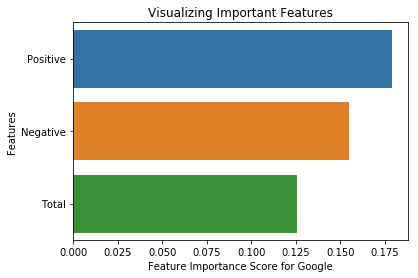

Total:  0.3320021629686853


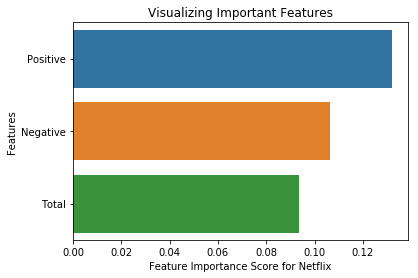

In [22]:
print("Amazon With Twitter Avg: ", Average(amazonWithTwitter))
print("Apple With Twitter Avg: ", Average(appleWithTwitter))
print("Facebook With Twitter Avg: ", Average(facebookWithTwitter))
print("Google With Twitter Avg: ", Average(googleWithTwitter))
print("Netflix With Twitter Avg: ", Average(netflixWithTwitter))
print('--------------------------')
print("Amazon Without Twitter Avg: ", Average(amazonWithoutTwitter))
print("Apple Without Twitter Avg: ", Average(appleWithoutTwitter))
print("Facebook Without Twitter Avg: ", Average(facebookWithoutTwitter))
print("Google Without Twitter Avg: ", Average(googleWithoutTwitter))
print("Netflix Without Twitter Avg: ", Average(netflixWithoutTwitter))
print()
print("Amazon With Twitter Fit: ", Average(amazonWithTwitter1))
print("Apple With Twitter Fit: ", Average(appleWithTwitter1))
print("Facebook With Twitter Fit: ", Average(facebookWithTwitter1))
print("Google With Twitter Fit: ", Average(googleWithTwitter1))
print("Netflix With Twitter Fit: ", Average(netflixWithTwitter1))
print('--------------------------')
print("Amazon Without Twitter Fit: ", Average(amazonWithoutTwitter1))
print("Apple Without Twitter Fit: ", Average(appleWithoutTwitter1))
print("Facebook Without Twitter Fit: ", Average(facebookWithoutTwitter1))
print("Google Without Twitter Fit: ", Average(googleWithoutTwitter1))
print("Netflix Without Twitter Fit: ", Average(netflixWithoutTwitter1))
print()

print("Total: ", Average(amazonPos)+Average(amazonNeg)+Average(amazonTot))      
sns.barplot(x=[Average(amazonPos),Average(amazonNeg),Average(amazonTot)],
            y=["Positive","Negative","Total"])
plt.xlabel('Feature Importance Score for Amazon')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

print("Total: ", Average(applePos)+Average(appleNeg)+Average(appleTot))
sns.barplot(x=[Average(applePos),Average(appleNeg),Average(appleTot)], 
            y=["Positive","Negative","Total"])
plt.xlabel('Feature Importance Score for Apple')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

print("Total: ", Average(facebookPos)+Average(facebookNeg)+Average(facebookTot))
sns.barplot(x=[Average(facebookPos),Average(facebookNeg),Average(facebookTot)],
            y=["Positive","Negative","Total"])
plt.xlabel('Feature Importance Score for Facebook')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
      
print("Total: ", Average(googlePos)+Average(googleNeg)+Average(googleTot))
sns.barplot(x=[Average(googlePos),Average(googleNeg),Average(googleTot)],
            y=["Positive","Negative","Total"])
plt.xlabel('Feature Importance Score for Google')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

print("Total: ", Average(netflixPos)+Average(netflixNeg)+Average(netflixTot))      
sns.barplot(x=[Average(netflixPos),Average(netflixNeg),Average(netflixTot)],
            y=["Positive","Negative","Total"])
plt.xlabel('Feature Importance Score for Netflix')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()